In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LASSOData = pd.read_csv('Data/LASSO-data-set.csv')
LASSOData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strength      1000 non-null   int64  
 1   dexterity     1000 non-null   int64  
 2   constitution  1000 non-null   int64  
 3   wisdom        1000 non-null   int64  
 4   intelligence  1000 non-null   int64  
 5   charisma      1000 non-null   int64  
 6   weight        1000 non-null   int64  
 7   height        1000 non-null   int64  
 8   modifier1     1000 non-null   int64  
 9   modifier2     1000 non-null   int64  
 10  modifier3     1000 non-null   int64  
 11  modifier4     1000 non-null   int64  
 12  modifier5     1000 non-null   int64  
 13  modifier6     1000 non-null   int64  
 14  modifier7     1000 non-null   int64  
 15  modifier8     1000 non-null   int64  
 16  score         1000 non-null   float64
dtypes: float64(1), int64(16)
memory usage: 132.9 KB


In [21]:
# seperate the dependent variable out
X = LASSOData.drop('score', axis=1)
print(X.info())

y = LASSOData['score']
print(y.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   strength      1000 non-null   int64
 1   dexterity     1000 non-null   int64
 2   constitution  1000 non-null   int64
 3   wisdom        1000 non-null   int64
 4   intelligence  1000 non-null   int64
 5   charisma      1000 non-null   int64
 6   weight        1000 non-null   int64
 7   height        1000 non-null   int64
 8   modifier1     1000 non-null   int64
 9   modifier2     1000 non-null   int64
 10  modifier3     1000 non-null   int64
 11  modifier4     1000 non-null   int64
 12  modifier5     1000 non-null   int64
 13  modifier6     1000 non-null   int64
 14  modifier7     1000 non-null   int64
 15  modifier8     1000 non-null   int64
dtypes: int64(16)
memory usage: 125.1 KB
None
0    652.566513
1    413.145270
2    510.830805
3    392.261796
4    472.258696
Name: score, dtype: float64


In [22]:
# Create testing and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


Do a Lasso Cross Validation model

In [23]:
# Train the model
from sklearn.linear_model import LassoCV
reg = LassoCV().fit(X_train, y_train)
print(f"Final apha value the model optimised on: {reg.alpha_}")


Final apha value the model optimised on: 1.0749236577654118


In [24]:
predictions_test_lasso = reg.predict(X_test)
residuals_test_lasso = predictions_test_lasso - y_test


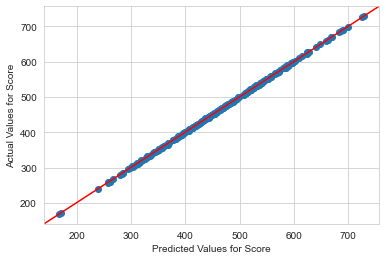

In [25]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red')
ax.scatter(x=predictions_test_lasso, y=y_test, )
""" ax.set_xlim(18, 37)
ax.set_ylim(18, 37) """
ax.set_xlabel('Predicted Values for Score')
ax.set_ylabel('Actual Values for Score')
plt.show()


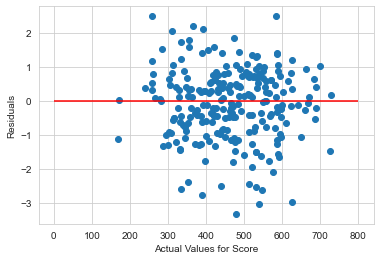

In [26]:
# Display the residuals versus the actual values
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.scatter(x=y_test, y=residuals_test_lasso)
ax.hlines(0, 0, 800, color='red')
""" ax.set_xlim(18, 37)
ax.set_ylim(18, 37) """
ax.set_xlabel('Actual Values for Score')
ax.set_ylabel('Residuals')
plt.show()


In [27]:
# Check the model fit
from sklearn.metrics import median_absolute_error
score_lasso = reg.score(X_test, y_test)
MAE_lasso = median_absolute_error(y_test, predictions_test_lasso)
print(f"R2 = {round(score_lasso,4)}")
print(
    f"Median Abs Error = {round(MAE_lasso,4)}")


R2 = 0.9999
Median Abs Error = 0.6513


In [28]:
# Get the model coefficients
coeffs_lasso = reg.coef_
print(len(coeffs_lasso))
columns = X_train.columns
string = f"y = {round(reg.intercept_,4)}"
for idx, coeff in enumerate(coeffs_lasso):
    string += f" + {round(coeff,4)}*{columns[idx]}"
print(string)
print(f"There are {(coeffs_lasso == 0).sum()} coefficients that equal zero")


16
y = -66.2292 + 0.0*strength + -0.0007*dexterity + -0.0*constitution + 0.0*wisdom + 0.0*intelligence + -0.0054*charisma + 3.9796*weight + -4.9927*height + 0.0*modifier1 + 0.0*modifier2 + 0.0199*modifier3 + 5.9776*modifier4 + -0.0*modifier5 + -0.0061*modifier6 + -0.0*modifier7 + -6.8683*modifier8
There are 8 coefficients that equal zero


Do a regular linear regression

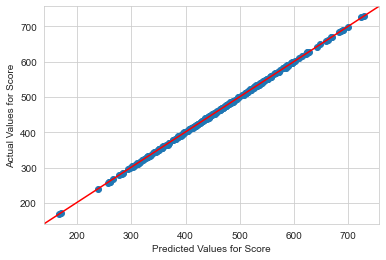

In [29]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red')
ax.scatter(x=predictions_test_lr, y=y_test, )
""" ax.set_xlim(18, 37)
ax.set_ylim(18, 37) """
ax.set_xlabel('Predicted Values for Score')
ax.set_ylabel('Actual Values for Score')
plt.show()


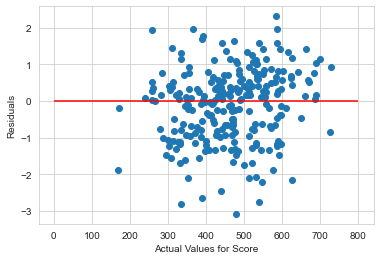

In [30]:
# Display the residuals versus the actual values
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.scatter(x=y_test, y=residuals_test_lr)
ax.hlines(0, 0, 800, color='red')
""" ax.set_xlim(18, 37)
ax.set_ylim(18, 37) """
ax.set_xlabel('Actual Values for Score')
ax.set_ylabel('Residuals')
plt.show()


In [31]:
# Check the model fit
from sklearn.metrics import median_absolute_error
score_lr = reglr.score(X_test, y_test)
MAE_lr = median_absolute_error(y_test, predictions_test_lr)
print(f"R2 = {round(score_lr,4)}")
print(
    f"Median Abs Error = {round(MAE_lr,4)}")


R2 = 0.9999
Median Abs Error = 0.6903


In [32]:
# Get the model coefficients
coeffs_lr = reglr.coef_
print(len(coeffs_lr))
columns = X_train.columns
string = f"y = {round(reglr.intercept_,4)}"
for idx, coeff in enumerate(coeffs_lr):
    string += f" + {round(coeff,4)}*{columns[idx]}"
print(string)
print(f"There are {(coeffs_lr == 0).sum()} coefficients that equal zero")


16
y = -69.422 + -0.0046*strength + -0.0013*dexterity + 0.0063*constitution + 0.0001*wisdom + 0.0002*intelligence + 0.0002*charisma + 4.008*weight + -5.0112*height + -0.0123*modifier1 + -0.002*modifier2 + 0.0096*modifier3 + 6.009*modifier4 + 0.0093*modifier5 + -0.0063*modifier6 + 0.0238*modifier7 + -7.0077*modifier8
There are 0 coefficients that equal zero


The models were remarkably similar in most of the metrics. This is probably because the linear regression model fits so closely already. The main difference is that the LASSO CV model removed 8 or the 16 coefficients while the linear regression model used all 16.

In [33]:
print(reg.get_params())
print(reg.alpha_)

{'alphas': None, 'copy_X': True, 'cv': None, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': None, 'normalize': False, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}
1.0749236577654118
